In [100]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

df = pd.read_csv("KAG_conversion_data.csv")
df.head()

,ad_id,xyz_campaign_id,fb_campaign_id,age,gender,interest,Impressions,Clicks,Spent,Total_Conversion,Approved_Conversion
0,708746,916,103916,30-34,M,15,7350,1,1.43,2,1
1,708749,916,103917,30-34,M,16,17861,2,1.82,2,0
2,708771,916,103920,30-34,M,20,693,0,0.00,1,0
3,708815,916,103928,30-34,M,28,4259,1,1.25,1,0
4,708818,916,103928,30-34,M,28,4133,1,1.29,1,1


The documenation describes the columns in the data as follows:

1.) `ad_id`: unique ID for each ad.

2.) `xyz_campaign_id`: an ID associated with each ad campaign of XYZ company.

3.) `fb_campaign_id`: an ID associated with how Facebook tracks each campaign.

4.) `age`: age of the person to whom the ad is shown.

5.) `gender`: gender of the person to whom the add is shown

6.) `interest`: a code specifying the category to which the person’s interest belongs (interests are as mentioned in the person’s Facebook public profile).

7.) `Impressions`: the number of times the ad was shown.

8.) `Clicks`: number of clicks on for that ad.

9.) `Spent`: Amount paid by company xyz to Facebook, to show that ad.

10.) `Total conversion`: Total number of people who enquired about the product after seeing the ad.

11.) `Approved conversion`: Total number of people who bought the product after seeing the ad.

In [101]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
ad_id,1143.0,987261.130359,193992.814738,708746.0,777632.50,1121185.00,1121804.500,1.314415e+06
xyz_campaign_id,1143.0,1067.382327,121.629393,916.0,936.00,1178.00,1178.000,1.178000e+03
fb_campaign_id,1143.0,133783.989501,20500.308622,103916.0,115716.00,144549.00,144657.500,1.799820e+05
interest,1143.0,32.766404,26.952131,2.0,16.00,25.00,31.000,1.140000e+02
Impressions,1143.0,186732.132983,312762.183208,87.0,6503.50,51509.00,221769.000,3.052003e+06
Clicks,1143.0,33.390201,56.892438,0.0,1.00,8.00,37.500,4.210000e+02
Spent,1143.0,51.360656,86.908418,0.0,1.48,12.37,60.025,6.399500e+02
Total_Conversion,1143.0,2.855643,4.483593,0.0,1.00,1.00,3.000,6.000000e+01
Approved_Conversion,1143.0,0.944007,1.737708,0.0,0.00,1.00,1.000,2.100000e+01


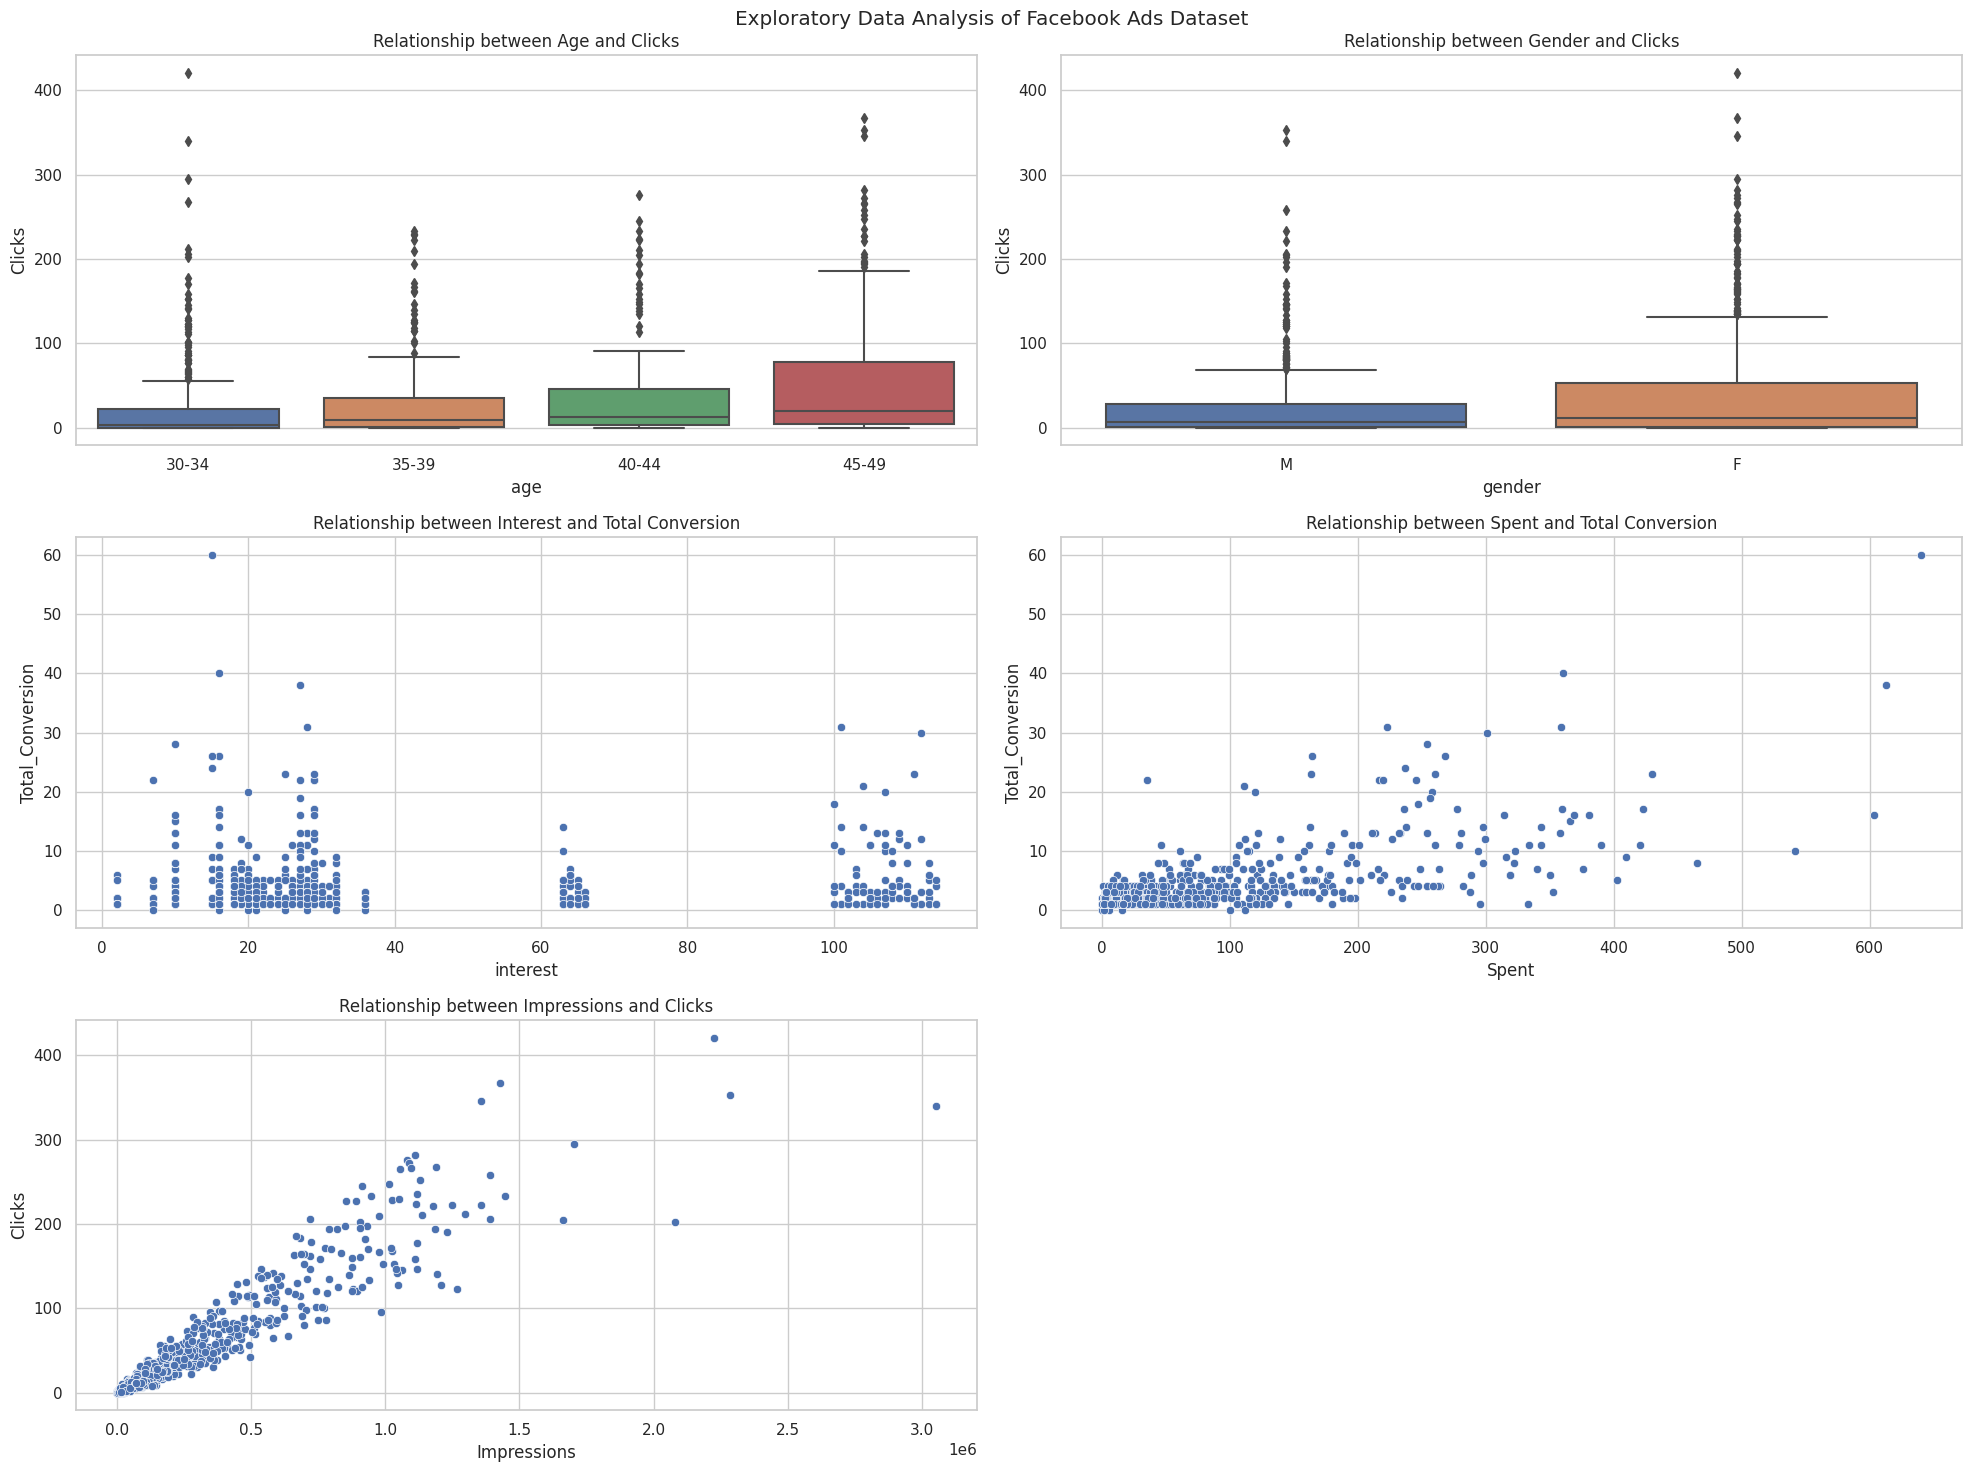

In [102]:
def plot_relationships(df):
    """
    Plots the relationships between various pairs of variables in the given dataframe.
    :param dataframe: pandas DataFrame containing the dataset.
    """

    # Setting up the visualisation settings
    sns.set(style="whitegrid")

    # Creating subplots
    fig, axes = plt.subplots(3, 2, figsize=(20, 15))
    fig.suptitle('Exploratory Data Analysis of Facebook Ads Dataset')

    # Plotting each relationship
    sns.boxplot(x='age', y='Clicks', data=df, ax=axes[0, 0])
    axes[0, 0].set_title('Relationship between Age and Clicks')

    sns.boxplot(x='gender', y='Clicks', data=df, ax=axes[0, 1])
    axes[0, 1].set_title('Relationship between Gender and Clicks')

    sns.scatterplot(x='interest', y='Total_Conversion', data=df, ax=axes[1, 0])
    axes[1, 0].set_title('Relationship between Interest and Total Conversion')

    sns.scatterplot(x='Spent', y='Total_Conversion', data=df, ax=axes[1, 1])
    axes[1, 1].set_title('Relationship between Spent and Total Conversion')

    sns.scatterplot(x='Impressions', y='Clicks', data=df, ax=axes[2, 0])
    axes[2, 0].set_title('Relationship between Impressions and Clicks')

    # Adjust layout
    plt.tight_layout()
    plt.subplots_adjust(top=0.95)

    # Hide empty subplot (for the 6th plot)
    fig.delaxes(axes[2][1])

    plt.show()

# Call the function with the dataset
plot_relationships(df)

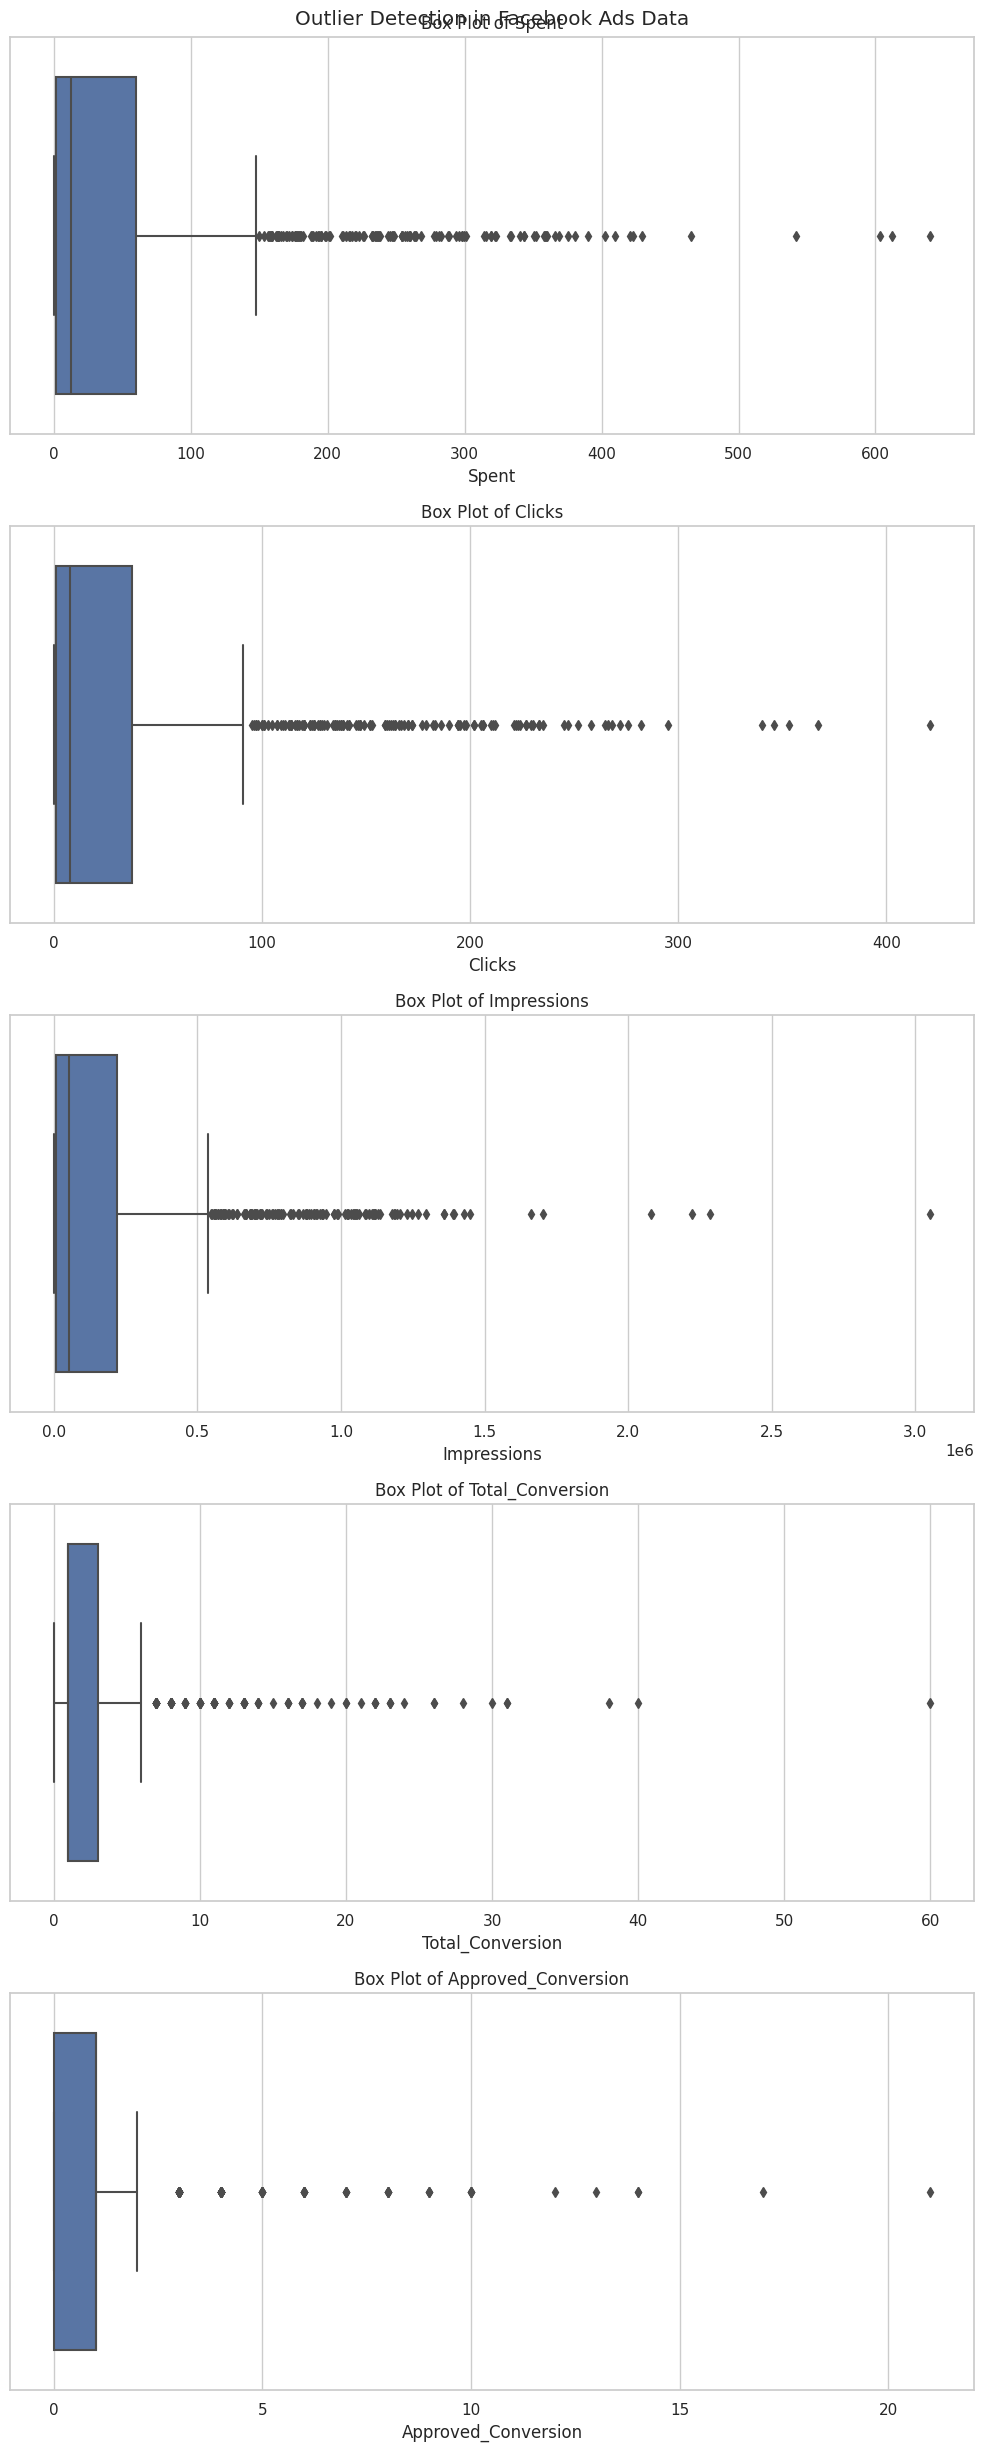

In [103]:
def plot_outliers(df, columns):
    """
    Plots box plots for the specified columns in the dataframe to visualize outliers.
    :param df: pandas DataFrame containing the dataset.
    :param columns: list of column names to plot for outlier detection.
    """
    num_of_columns = len(columns)
    fig, axes = plt.subplots(num_of_columns, 1, figsize=(10, 5 * num_of_columns))
    fig.suptitle('Outlier Detection in Facebook Ads Data')

    if num_of_columns == 1:
        axes = [axes]  # Ensure axes is iterable for a single column

    for i, col in enumerate(columns):
        sns.boxplot(x=df[col], ax=axes[i])
        axes[i].set_title(f'Box Plot of {col}')

    plt.tight_layout()
    plt.show()

# features to detect and review of outliers
columns_to_check = ['Spent', 'Clicks', 'Impressions', 'Total_Conversion', 'Approved_Conversion']

# Calling of function
plot_outliers(df, columns_to_check)


**Spent:** There are some outliers present, which indicates that some advertising campaigns are significantly more costly than others. This may require a more detailed examination of the efficiency or performance of certain campaigns in terms of budget.

**Clicks:** Advertisements with high click counts are present. This indicates that certain ads either have compelling content or, even if it's not apparent from the dataset, they are reaching their target audience.

**Impressions:** There are also a significant number of outliers in the number of impressions. This could prove that some ads are reaching a wide audience.

**Total_Conversion and Approved_Conversion:** There are outliers in both variables indicating that some ads have much higher conversion rates than others. This could reflect how well these ads fit the target audience or the quality of the advertisement itself.

Apart from this analysis, a detailed examination of Total_Conversion in conjunction with Approved_Conversion could be beneficial. Specifically, analyzing campaigns that exhibit either high performance or lower-than-expected performance is particularly crucial in this context.

## "Total_Conversion" & "Approved_Conversion"

Analyzing campaigns using `Total_Conversion` and `Approved_Conversion` metrics is a great way to understand the effectiveness of different campaigns. These metrics help gauge how well ads achieve their ultimate objectives.

To conduct this analysis, it's important to first examine the distribution of values in these metrics to establish a threshold. This threshold can then be used to differentiate between high and low-performing campaigns. Commonly, these threshold values are set based on the median, mean, or a specific percentile (for example, the top or bottom 10%).

Initially, I would analyze descriptive statistics for `Total_Conversion` and `Approved_Conversion` to understand their basic statistical properties and determine appropriate threshold values. After establishing these thresholds, campaigns can be classified accordingly, and the characteristics of high/low-performing campaigns can be examined in detail.

This method provides a structured approach to identify and analyze the performance of different campaigns, allowing for more targeted strategies and adjustments.

In [104]:
import statsmodels.api as sm
from scipy import stats

# Correlation Analysis
correlation_matrix = df.corr()

# Linear Regression: 'Spent' vs 'Total_Conversion'
# Preparing the data for the model
X = df['Spent']  # Predictor variable
y = df['Total_Conversion']  # Response variable

# Adding a constant to the model (intercept)
X = sm.add_constant(X)

# Building the linear regression model
model = sm.OLS(y, X).fit()

# Summary of the regression model
model_summary = model.summary()

correlation_matrix, model_summary

<ipython-input-104-e4f04d8e0afe>:5: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  correlation_matrix = df.corr()


(                        ad_id  xyz_campaign_id  fb_campaign_id  interest  \
 ad_id                1.000000         0.929892        0.972002  0.456483   
 xyz_campaign_id      0.929892         1.000000        0.872392  0.272282   
 fb_campaign_id       0.972002         0.872392        1.000000  0.595753   
 interest             0.456483         0.272282        0.595753  1.000000   
 Impressions          0.462308         0.495273        0.439439  0.101973   
 Clicks               0.431981         0.469729        0.406978  0.088706   
 Spent                0.433053         0.476689        0.403532  0.070226   
 Total_Conversion     0.346539         0.346684        0.344170  0.120270   
 Approved_Conversion  0.271331         0.284968        0.257658  0.058353   
 
                      Impressions    Clicks     Spent  Total_Conversion  \
 ad_id                   0.462308  0.431981  0.433053          0.346539   
 xyz_campaign_id         0.495273  0.469729  0.476689          0.346684   
 fb

This approach to analyzing the relationships between variables in your dataset, particularly focusing on the correlation between `Spent` and other variables, and then examining the relationship between `Spent` and `Total_Conversion` using a linear regression model, is methodical and informative. Let's review the key findings:

**Correlation Analysis:**
- The correlation matrix reveals significant relationships among the variables in your dataset. Notably, there's a very high correlation between `Spent` and `Clicks` (0.9929), indicating that as spending increases, clicks tend to increase proportionally.
- A strong correlation also exists between `Spent` and `Impressions` (0.9704). This suggests that higher advertising spending is associated with more ad impressions.
- Significant correlations are observed between `Total_Conversion` and `Spent,` `Clicks,` and `Impressions,` with correlation coefficients of 0.7254, 0.6946, and 0.8128, respectively. This indicates that these variables are likely influential in driving total conversions.

**Linear Regression Model:**
- The linear regression model analyzing the relationship between `Spent` and `Total_Conversion` shows a moderate explanatory power with an R-squared value of 0.526. This means that about 52.6% of the variance in `Total_Conversion` can be explained by the `Spent` variable.
- The model coefficient (coef) for `Spent` is 0.0374, implying that for every unit increase in spending, there is an average increase of 0.0374 units in `Total_Conversion.` This suggests a positive relationship between advertising spend and conversion rates.
- The P-value (<0.0001) indicates that the model is statistically significant, reinforcing the reliability of these findings.

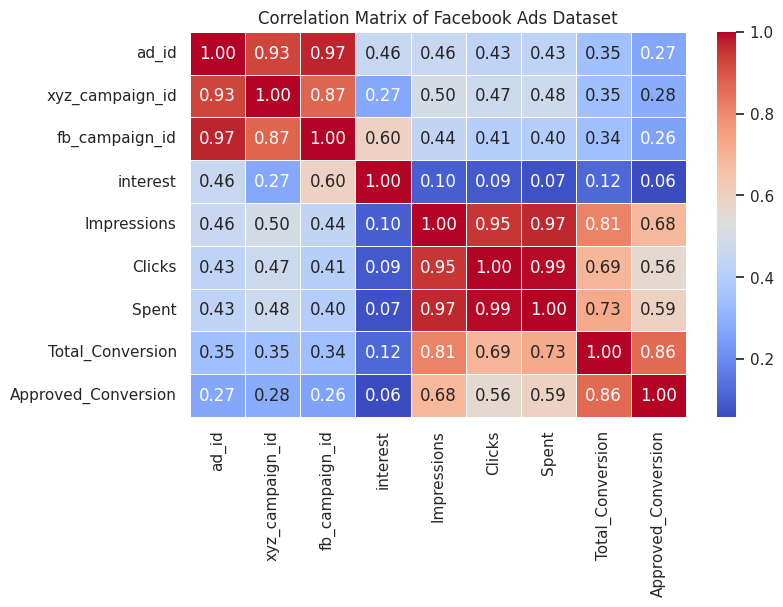

In [105]:
# Generating a heatmap for the correlation matrix

plt.figure(figsize=(8, 5))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=.5)
plt.title('Correlation Matrix of Facebook Ads Dataset')
plt.show()

Based on the heatmap you created:

1. **Spent & Clicks**: There is a very high positive correlation (0.99) between these two variables. This indicates that as expenditure increases, the number of clicks also significantly increases.

2. **Spent & Impressions**: Again, there is a very high positive correlation (0.97). This suggests that as more is spent on advertisements, they reach a larger audience.

3. **Clicks & Impressions**: There is also a high positive correlation (0.95) between these two variables. This means that advertisements reaching more people tend to get more clicks.

4. **Total_Conversion & Approved_Conversion**: There is a strong positive correlation (0.86) between these two variables. This shows that as the total number of conversions increases, the number of approved conversions also increases.

From analyzing these correlations, we can gain important insights for understanding various aspects of your advertising campaigns. For example, it shows how increasing expenditures affect both the number of clicks and impressions, and how these variables are related to conversions.

I can also provide explanations about the weak and moderate positive correlations observed in the heatmap.

**Weak Correlations:**
- For instance, `interest` generally shows weak correlations with other variables (such as `Clicks`, `Spent`, `Total_Conversion`). This indicates that user interests might not have a significant relationship with other metrics like click numbers or expenditures. This could suggest that interests may be less effective in influencing the success of an advertisement than expected.

**Moderate Positive Correlations:**
- The correlation between `Spent` and `Total_Conversion` is moderately positive (0.73). This indicates that as expenditures increase, the total number of conversions tends to increase as well, but the relationship is not extremely strong. It could suggest that other factors also influence total conversions, but it’s not clear enough to make a strong statement.

- Similarly, the correlation between `Impressions` and `Total_Conversion` is also moderately positive (0.81). This suggests that more impressions generally lead to more conversions, but the relationship is not absolute.

These types of correlations are important factors to consider when planning and optimizing your ad campaigns. Particularly, understanding how increases in expenditures and impressions affect conversions can help you manage your budget more effectively and make more informed decisions.

In [106]:
# Descriptive analysis for Total_Conversion & Approved_Conversion
total_conversion_stats = df['Total_Conversion'].describe()
approved_conversion_stats = df['Approved_Conversion'].describe()

total_conversion_stats, approved_conversion_stats

(count    1143.000000
 mean        2.855643
 std         4.483593
 min         0.000000
 25%         1.000000
 50%         1.000000
 75%         3.000000
 max        60.000000
 Name: Total_Conversion, dtype: float64,
 count    1143.000000
 mean        0.944007
 std         1.737708
 min         0.000000
 25%         0.000000
 50%         1.000000
 75%         1.000000
 max        21.000000
 Name: Approved_Conversion, dtype: float64)

I will separate campaigns into high and low-performing groups using the determined threshold values for `Total_Conversion` and `Approved_Conversion.` Then, by examining the other characteristics of these two groups, I will gain insights.

As a first step, let's differentiate between high and low-performing campaigns:

The number of high-performing campaigns was determined to be 635, while the number of low-performing campaigns was identified as 508. Now, by examining the other characteristics of these two groups, we will identify differences and similarities.

During this examination, I will look at features such as `Spent`, `Clicks`, the number of impressions `Impressions`, and target audience characteristics like `age` and `gender` for both groups. This analysis can be useful for understanding which factors are associated with high performance and the possible causes of low performance.

In [107]:
# Identify high and low performing campaigns
high_performance = df[(df['Total_Conversion'] >= 3) | (df['Approved_Conversion'] >= 1)]
low_performance = df[(df['Total_Conversion'] < 3) & (df['Approved_Conversion'] < 1)]

# Number of high and low performing campaigns
num_high_performance = high_performance.shape[0]
num_low_performance = low_performance.shape[0]

num_high_performance, num_low_performance

(635, 508)

In [108]:
# Key statistics for high and low performing groups
high_performance_stats = high_performance[['Spent', 'Clicks', 'Impressions']].describe()
low_performance_stats = low_performance[['Spent', 'Clicks', 'Impressions']].describe()

high_performance_stats, low_performance_stats

(            Spent      Clicks   Impressions
 count  635.000000  635.000000  6.350000e+02
 mean    78.134063   50.598425  2.874962e+05
 std    104.923175   68.663039  3.797816e+05
 min      0.000000    0.000000  8.700000e+01
 25%      3.860000    3.000000  1.369200e+04
 50%     35.310000   23.000000  1.328030e+05
 75%    113.835002   69.000000  4.189690e+05
 max    639.949998  421.000000  3.052003e+06,
             Spent      Clicks    Impressions
 count  508.000000  508.000000     508.000000
 mean    17.893898   11.879921   60777.031496
 std     35.021391   23.676721  106583.927534
 min      0.000000    0.000000     199.000000
 25%      0.000000    0.000000    3445.500000
 50%      4.085000    3.000000   15489.500000
 75%     19.502500   13.000000   73042.000000
 max    332.989999  227.000000  906151.000000)

I will separate campaigns into high and low-performing groups using the established threshold values for `Total_Conversion` and `Approved_Conversion`. Afterwards, I will examine other characteristics of these two groups (such as expenditure, number of clicks, impressions, target audience characteristics) to gain insights.

As the first step, let's differentiate between high and low-performing campaigns:

The number of high-performing campaigns was identified as 635, while the number of low-performing campaigns was 508. Now, by examining the other characteristics of these two groups, we will identify differences and similarities.

During this examination, I will look at features such as `Spent`, `Clicks`, `Impressions`, and target audience characteristics like `age` and `gender` for both groups. This analysis can be useful for understanding which factors are associated with high performance and the possible causes of low performance.

Let's first examine the basic statistics of these features for both groups. Below are the basic statistics for the `Spent`, `Clicks`, and `Impressions` features of high and low-performing campaigns. Here, I assumed the currency as USD for convenience.

**High-Performing Campaigns:**
- **Spent**: Average around 78.13 USD, maximum expenditure 639.95 USD.
- **Clicks**: Average around 50.60, maximum clicks 421.
- **Impressions**: Average around 287,496, maximum impressions 3,052,003.

**Low-Performing Campaigns:**
- **Spent**: Average around 17.89 USD, maximum expenditure 332.99 USD.
- **Clicks**: Average around 11.88, maximum clicks 227.
- **Impressions**: Average around 60,777, maximum impressions 906,151.

From these statistics, we can see that high-performing campaigns generally spend more, have more clicks, and more impressions. This suggests that high performance may be associated with higher budgets and greater visibility.

Additionally, by looking at target audience characteristics (age and gender), we can analyze in which demographic groups the high-performing campaigns perform better. This could provide insights into the effectiveness of your targeting strategies.

In [109]:
# Age distribution
age_distribution_high = high_performance['age'].value_counts().sort_index()
age_distribution_low = low_performance['age'].value_counts().sort_index()

# Gender distribution
gender_distribution_high = high_performance['gender'].value_counts()
gender_distribution_low = low_performance['gender'].value_counts()

age_distribution_high, age_distribution_low, gender_distribution_high, gender_distribution_low

(30-34    239
 35-39    138
 40-44    116
 45-49    142
 Name: age, dtype: int64,
 30-34    187
 35-39    110
 40-44     94
 45-49    117
 Name: age, dtype: int64,
 M    338
 F    297
 Name: gender, dtype: int64,
 M    254
 F    254
 Name: gender, dtype: int64)

Now, I will analyze the target audience characteristics of high and low-performing campaigns, focusing on age and gender distributions, and examine how these characteristics are associated with high and low-performing campaigns.

Let's start by examining the age and gender distribution for both groups. This will help us understand which demographic groups contribute to higher or lower performance. First, I'll look at the age distribution.

Here are the age and gender distributions for high and low-performing campaigns:

**High-Performing Campaigns:**
- **Age Distribution:**
  - 30-34 years: 239
  - 35-39 years: 138
  - 40-44 years: 116
  - 45-49 years: 142
- **Gender Distribution:**
  - Male (M): 338
  - Female (F): 297

**Low-Performing Campaigns:**
- **Age Distribution:**
  - 30-34 years: 187
  - 35-39 years: 110
  - 40-44 years: 94
  - 45-49 years: 117
- **Gender Distribution:**
  - Male (M): 254
  - Female (F): 254

Based on these results, high-performing campaigns are generally concentrated in the "30-34" and "45-49" age groups. In terms of gender, males are slightly more represented in high-performing campaigns, but the difference is not as pronounced when compared with low-performing campaigns.

This analysis can be useful in understanding how specific age groups and genders respond to your ad campaigns. Particularly, we can see that campaigns targeting the "30-34" and "45-49" age groups perform better than other age groups. This might indicate a need to optimize your targeting strategies to focus on these demographic groups.

### Regional Analysis using GeoPandas

In [110]:
# Redefining the latitude and longitude ranges for Central Europe
central_europe_latitude_range = (44, 55)  # North
central_europe_longitude_range = (5, 25)  # East

# Generating random latitude and longitude values within these ranges
np.random.seed(0)  # For reproducibility
df['Latitude'] = np.random.uniform(central_europe_latitude_range[0], central_europe_latitude_range[1], df.shape[0])
df['Longitude'] = np.random.uniform(central_europe_longitude_range[0], central_europe_longitude_range[1], df.shape[0])

# Displaying the first few rows with the new columns
df.head()

,ad_id,xyz_campaign_id,fb_campaign_id,age,gender,interest,Impressions,Clicks,Spent,Total_Conversion,Approved_Conversion,Latitude,Longitude
0,708746,916,103916,30-34,M,15,7350,1,1.43,2,1,50.036949,18.674529
1,708749,916,103917,30-34,M,16,17861,2,1.82,2,0,51.867083,7.048926
2,708771,916,103920,30-34,M,20,693,0,0.00,1,0,50.630397,12.940517
3,708815,916,103928,30-34,M,28,4259,1,1.25,1,0,49.993715,10.532995
4,708818,916,103928,30-34,M,28,4133,1,1.29,1,1,48.660203,15.126858


In [111]:
!pip install basemap # need to install basemap package to use administrative and political map

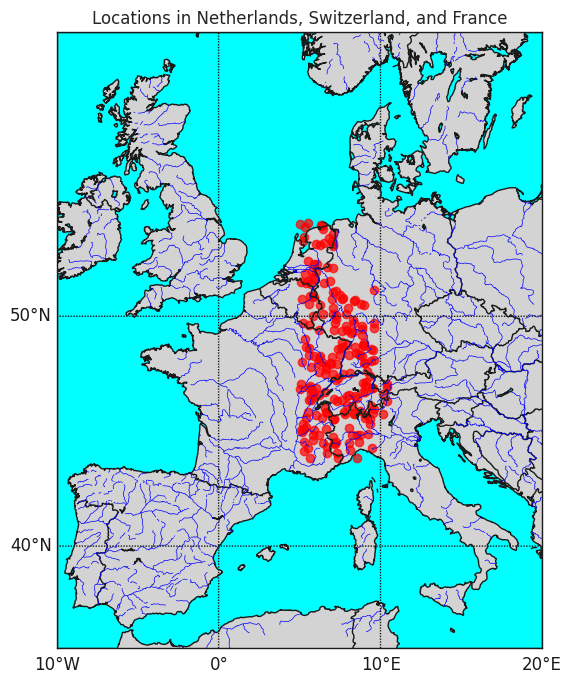

In [112]:
from mpl_toolkits.basemap import Basemap

# Defining latitude and longitude ranges for Netherlands, Switzerland, and France
# Netherlands: Latitude 50.7504° N to 53.5552° N, Longitude 3.3576° E to 7.2275° E
# Switzerland: Latitude 45.8180° N to 47.8085° N, Longitude 5.9559° E to 10.4921° E
# France: Latitude 41.3034° N to 51.1242° N, Longitude -5.2660° W (4.7340° E) to 9.6625° E

# Filtering the data for these countries
filtered_data = df[
    ((50.7504 <= df['Latitude']) & (df['Latitude'] <= 53.5552) &
     (3.3576 <= df['Longitude']) & (df['Longitude'] <= 7.2275)) |  # Netherlands
    ((45.8180 <= df['Latitude']) & (df['Latitude'] <= 47.8085) &
     (5.9559 <= df['Longitude']) & (df['Longitude'] <= 10.4921)) |  # Switzerland
    ((41.3034 <= df['Latitude']) & (df['Latitude'] <= 51.1242) &
     (-5.2660 <= df['Longitude']) & (df['Longitude'] <= 9.6625))     # France
]

# Creating a new figure for map visualization
fig, ax = plt.subplots(figsize=(8, 8))

# Create a Basemap for Europe with more details
m = Basemap(resolution='i',  # intermediate resolution
            projection='merc',  # Mercator projection
            lat_0=49.5, lon_0=15.0,  # Central Europe lat/lon
            llcrnrlon=-10, llcrnrlat=35, urcrnrlon=20, urcrnrlat=60)  # Adjusted bounding box


# Draw map details
m.drawmapboundary(fill_color='aqua')
m.drawcountries(linewidth=1)
m.fillcontinents(color='lightgray', lake_color='aqua')
m.drawcoastlines()
m.drawrivers(color='blue')
m.drawparallels(np.arange(-90., 91., 10.), labels=[True, False, False, False])
m.drawmeridians(np.arange(-180., 181., 10.), labels=[False, False, False, True])

# Plot the filtered data
x, y = m(filtered_data['Longitude'].values, filtered_data['Latitude'].values)
m.scatter(x, y, color='red', marker='o', alpha=0.7)

plt.title('Locations in Netherlands, Switzerland, and France')
plt.show()


I adjusted the latitude and longitude ranges to focus on a narrower region, creating coordinates specific to Central Europe. Here, I have randomly generated fictitious coordinates for the purpose of implementing a regional marketing strategy. Therefore, I used Numpy to produce some regional data and added it to the dataset.

To achieve more realistic results for my location data in Europe, I used certain limitations, identifying them as countries in Central Europe. The following geographical boundaries can roughly be used for Central Europe:

- Latitude: 44°N to 55°N
- Longitude: 5°E to 25°E

Each ad is associated with a random location in Central Europe. If this were based on real data, it could have been a method to analyze the geographic distribution and performance of ad campaigns in Central Europe. My current application is a small study to add a geographical dimension to the dataset, as an example.

To use a customized map, I wanted to create a detailed map showing a part of Europe and the locations in the specified countries using the `mpl_toolkits.basemap` library.

The main steps of the code are as follows:

1. **Defining Geographic Areas**: Specific latitude and longitude ranges are defined for the Netherlands, Switzerland, and France. This is used to filter the locations in the dataset according to these three countries.

2. **Data Filtering**: The dataset is filtered according to the defined geographical ranges. This creates a subset that only includes locations within the Netherlands, Switzerland, and France.

3. **Map Creation and Visualization**: A map of Europe is created using the `Basemap` library. This map includes country borders, coastlines, rivers, and other geographical details.

4. **Displaying Locations on the Map**: Locations from the filtered dataset are visualized as red dots on the map. This shows the distribution of ad locations in the specified countries.

Such visualization helps you understand the geographic distribution of your ad campaigns and can assist in reviewing your marketing strategies in specific countries or regions. It also allows for a better understanding of the impact of geographic locations on ad performance.

### Ad Performance Analysis by Age and Gender
* Click-Through Rate (CTR): The ratio of clicks per impression. This indicates how attractive the ad is.
* Conversion Rate: Total conversions per clicks. This shows how effective the ad is.
* Cost Per Conversion (CPC): The average amount spent per conversion.

I will compare these metrics across different age groups and genders. This analysis will help in understanding which demographic groups perform better and which groups you should focus on. First, we need to arrange the dataset to calculate these metrics.

In [113]:
# We will calculate performance metrics based on age and gender

# Click-Through Rate (CTR) = Clicks / Impressions
# Conversion Rate = Total_Conversion / Clicks
# Cost Per Conversion (CPC) = Spent/Clicks (we will exclude data with zero clicks when calculating CPC)

# First we exclude data with zero clicks to calculate cost per click
data_non_zero_clicks = df[df['Clicks'] > 0]
data_non_zero_clicks['CPC'] = data_non_zero_clicks['Spent'] / data_non_zero_clicks['Clicks']

# Now let's calculate CTR and Conversion Rate on the entire data set
df['CTR'] = df['Clicks'] / df['Impressions']
df['Conversion_Rate'] = df['Total_Conversion'] / df['Clicks'].replace(0, 1)  # To avoid zero division error

# Let's group by age and gender and calculate the average values
performance_metrics = df.groupby(['age', 'gender']).agg({
    'CTR': 'mean',
    'Conversion_Rate': 'mean',
    'Spent': 'mean'
}).reset_index()

# Let's add the CPC in the non-zero clicks dataset
cpc_metrics = data_non_zero_clicks.groupby(['age', 'gender'])['CPC'].mean().reset_index()
performance_metrics = performance_metrics.merge(cpc_metrics, on=['age', 'gender'])

performance_metrics.sort_values(by=['age', 'gender'])


<ipython-input-113-1170fc7bd444>:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_non_zero_clicks['CPC'] = data_non_zero_clicks['Spent'] / data_non_zero_clicks['Clicks']


,age,gender,CTR,Conversion_Rate,Spent,CPC
0,30-34,F,0.000135,0.534931,38.636954,1.439525
1,30-34,M,0.000100,0.668134,33.366463,1.568945
2,35-39,F,0.000193,0.373863,55.608716,1.418482
3,35-39,M,0.000139,0.406067,36.338705,1.596989
4,40-44,F,0.000221,0.288169,69.126916,1.408659
5,40-44,M,0.000179,0.320099,40.710194,1.543956
6,45-49,F,0.000257,0.216236,97.342101,1.439651
7,45-49,M,0.000167,0.322634,60.474876,1.556004


* **Click-Through Rate (CTR):** Generally, we observe an increase in CTR with age. Women in the 45-49 age group have the highest CTR. This indicates that women in this age group tend to click on ads more.

* **Conversion Rate:** The highest conversion rate is among men aged 30-34. This suggests that individuals in this group are more likely to take action after seeing an ad.

* **Average Spending:** The highest average spending is for women in the 45-49 age group. This implies that the cost of advertisements targeting this group is higher.

* **Cost Per Click (CPC):** In terms of CPC, we see the highest cost for men in the 35-39 age group. This indicates that advertisements targeting this group are more costly per click.

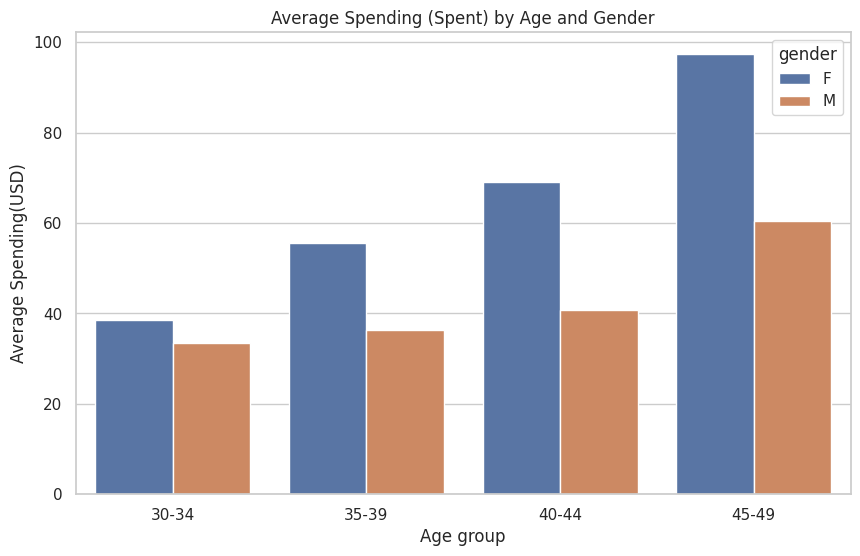

In [114]:
# Bar chart for Average Spend (Spent)
plt.figure(figsize=(10, 6))
sns.barplot(x='age', y='Spent', hue='gender', data=performance_metrics)
plt.title('Average Spending (Spent) by Age and Gender')
plt.xlabel('Age group')
plt.ylabel('Average Spending(USD)')
plt.show()


This graph displays the Average Spending across different age groups and genders. Here, we can see that the average spending for women in the **45-49** age range is significantly higher compared to other groups. This indicates that the cost of advertisements targeting this demographic group is higher.